## Importing Pages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading-In Data

In [ ]:
df_ml = pd.read_csv("../data/data_ml_chapter_1.csv")
df_ml

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd,R1M_Usd_median,R12M_Usd_median,R1M_Usd_C,R12M_Usd_C
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.84,0.88,0.089,0.104,0.344,-0.041,0.019,-0.0560,1.0,1.0
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.84,0.88,0.039,0.091,-0.011,-0.253,0.006,-0.0965,1.0,0.0
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.87,0.88,-0.012,0.101,0.118,-0.366,0.006,-0.1350,0.0,0.0
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,1.00,0.99,0.174,-0.144,-0.518,-0.376,-0.025,-0.0320,1.0,0.0
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,1.00,0.99,-0.106,-0.576,-0.535,-0.113,0.011,-0.0035,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268331,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.34,0.63,-0.029,-0.027,0.038,0.112,0.041,0.0980,0.0,1.0
268332,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.29,0.64,0.028,0.077,0.175,0.122,0.007,0.1900,1.0,0.0
268333,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.27,0.64,0.011,0.076,0.152,0.091,0.039,0.1550,0.0,0.0
268334,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.26,0.66,0.045,0.178,0.196,0.040,0.020,0.1155,1.0,0.0


## Correlations between Features and Labels

In the figure below, we show a box plot that illustrates the distribution of correlations between features and the one month ahead return. The correlations are computed on a date-by-date basis, over the whole cross-section of stocks. They are mostly located close to zero, but some dates seem to experience extreme values. The market capitalization has the median which is the most negative while volatility is the only predictor with positive median correlation (this particular example seems to refute the low risk anomaly).

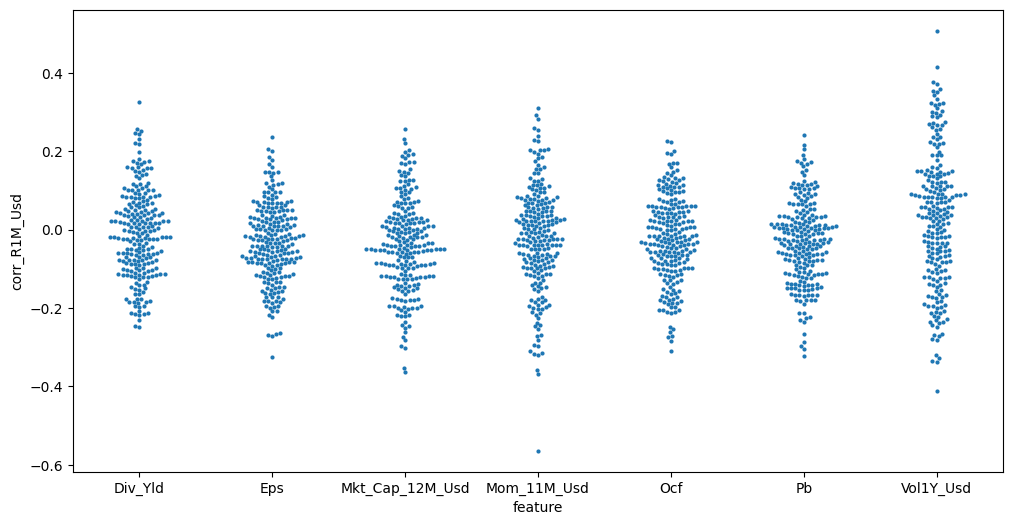

In [ ]:
features_short = [
    "Div_Yld",
    "Eps", 
    "Mkt_Cap_12M_Usd", 
    "Mom_11M_Usd", 
    "Ocf",
    "Pb", 
    "Vol1Y_Usd",
]
cols = features_short+["R1M_Usd","date"]
df_corr = df_ml[cols]
df_corr = \
    (
    df_corr.groupby("date").corr()[["R1M_Usd"]]
        .reset_index()
        .rename(columns={"level_1":"feature", "R1M_Usd":"corr_R1M_Usd"})
    )
df_corr = df_corr.query("feature != 'R1M_Usd'")
plt.figure(figsize=(12,6))              
sns.swarmplot(x="feature", y="corr_R1M_Usd", data=df_corr, size=3); 

## Conditional Average - The Regression Function(s)

More importantly, when seeking to work with supervised learning (as we will do most of the time), the link of some features with the dependent variable can be further characterized by the smoothed conditional average because it shows how the features impact the label. The use of the conditional average has a deep theoretical grounding. Suppose there is only one feature $X$ and that we seek a model  $Y=f(X)+\text{error}$, where variables are real-valued. The function $f$ that minimizes the average squared error $E[(Y−f(X))2]$ is the so-called regression function (see Section 2.4 in Hastie, Tibshirani, and Friedman (2009)):
\begin{align*}
f(x)=E[Y|X=x]
\end{align*}
In Figure 4.2, we plot two illustrations of this function when the dependent variable ($Y$) is the one month ahead return. The first one pertains to the average market capitalization over the past year and the second to the volatility over the past year as well. Both predictors have been uniformized (see Section 4.4.2 below) so that their values are uniformly distributed in the cross-section of assets for any given time period. Thus, the range of features is  [0,1] and is shown on the  $x$-axis of the plot. The colored corridors around the lines show 95% level confidence interval for the computation of the mean. Essentially, it is narrow when both (i) many data points are available and (ii) these points are not too dispersed.

The two variables have a close to monotonic impact on future returns. Returns, on average, decrease with market capitalization (thereby corroborating the so-called size effect). The reverse pattern is less pronounced for volatility: the curve is rather flat for the first half of volatility scores and progressively increases, especially over the last quintile of volatility values (thereby contradicting the low-volatility anomaly).

In [ ]:
df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]]

,R1M_Usd,Mkt_Cap_12M_Usd,Vol1Y_Usd
0,0.089,0.24,0.84
1,0.039,0.24,0.84
2,-0.012,0.25,0.87
3,0.174,0.33,1.00
4,-0.106,0.30,1.00
...,...,...,...
268331,-0.029,0.97,0.34
268332,0.028,0.96,0.29
268333,0.011,0.96,0.27
268334,0.045,0.96,0.26


In [ ]:
pd.melt(df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]], id_vars="R1M_Usd")

,R1M_Usd,variable,value
0,0.089,Mkt_Cap_12M_Usd,0.24
1,0.039,Mkt_Cap_12M_Usd,0.24
2,-0.012,Mkt_Cap_12M_Usd,0.25
3,0.174,Mkt_Cap_12M_Usd,0.33
4,-0.106,Mkt_Cap_12M_Usd,0.30
...,...,...,...
536667,-0.029,Vol1Y_Usd,0.34
536668,0.028,Vol1Y_Usd,0.29
536669,0.011,Vol1Y_Usd,0.27
536670,0.045,Vol1Y_Usd,0.26


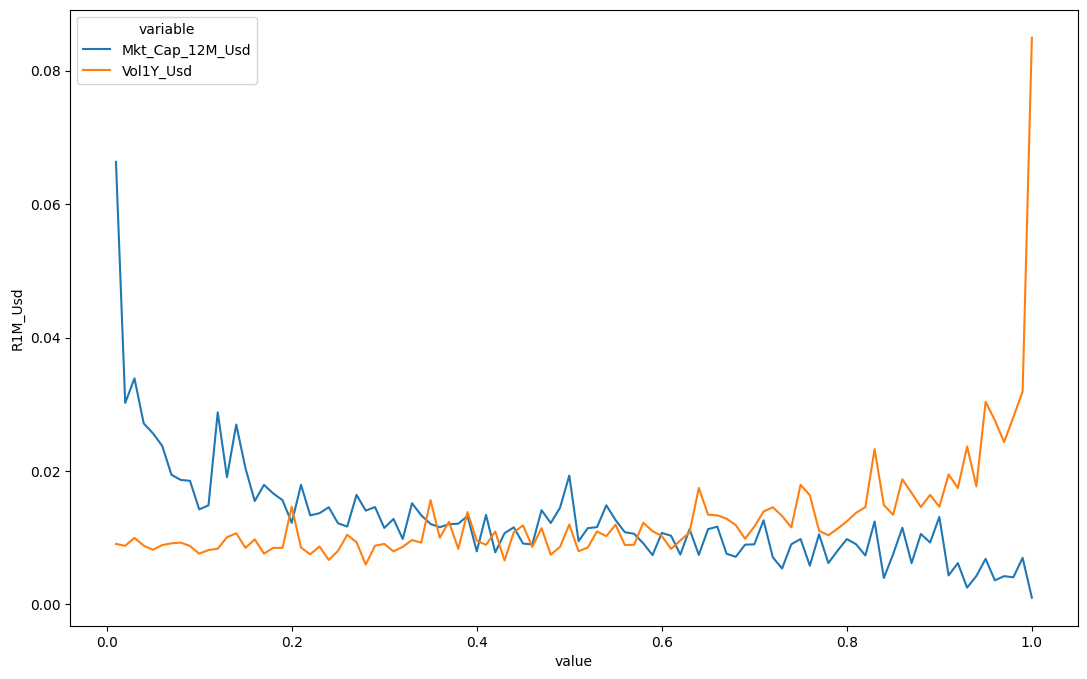

In [ ]:
df_pivoted = \
    (
    pd.melt(df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]], id_vars="R1M_Usd")
        .groupby(["variable", "value"])[["R1M_Usd"]].mean()
        .reset_index()
    )
plt.figure(figsize=(13,8))
sns.lineplot(data = df_pivoted, y="R1M_Usd", x="value", hue="variable");

We can use the builtin aggregation functionality of `sns.linplot()` do this in a single line of code, thus avoiding having to use `.groupby()`.  The added benefit of this approach is that we get confidence intervals. 

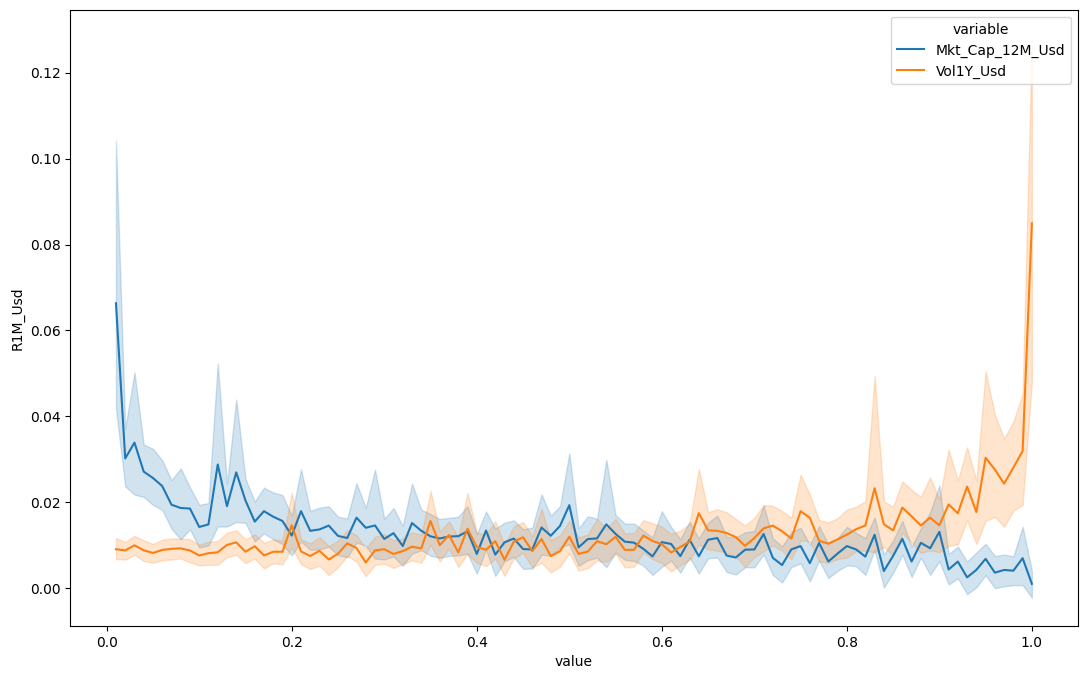

In [ ]:
df_pivoted = pd.melt(df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]], id_vars="R1M_Usd")
plt.figure(figsize=(13,8))
sns.lineplot(data = df_pivoted, y="R1M_Usd", x="value", hue="variable");

## OLD CODE

In [ ]:
#df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]]

In [ ]:
#pd.melt(df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]], id_vars="R1M_Usd")

In [ ]:
# (
# pd.melt(df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]], id_vars="R1M_Usd")
#     .query("variable=='Mkt_Cap_12M_Usd'")
#     .groupby(['value'])[["R1M_Usd"]].mean()
#     .reset_index()
# ).plot(x="value", y="R1M_Usd")